<a href="https://colab.research.google.com/github/Yasegshk/TFM/blob/main/TFM_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

En este notebook se va a llevar a cabo un análisis de características y PCA, para posteriormente llevar a cabo la implementación de los modelos de Machine Learning necesarios.

In [ ]:
#Módulos previos
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import corrcoef, transpose, arange
from pylab import pcolor, show, colorbar, xticks, yticks
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
#Modulos modelos
import pylab as pl
import scipy.optimize as opt
import random
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, classification_report, plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn import svm
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import multiprocessing
import itertools
import seaborn as sns

from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.inspection import permutation_importance
from sklearn.tree import DecisionTreeClassifier
from pylab import rcParams
from collections import Counter

In [ ]:
pd.options.display.max_columns = None

datos12 = pd.read_csv("C:/Users/Yasa/Desktop/TFM/ML/DATOS_E12.csv")
datos34 = pd.read_csv("C:/Users/Yasa/Desktop/TFM/ML/DATOS_E34.csv")

datos12.drop(['Unnamed: 0'], axis = 'columns', inplace=True)
datos34.drop(['Unnamed: 0'], axis = 'columns', inplace=True)
DATOS = pd.concat([datos12, datos34]).reset_index(drop=True)
DATOS

C:\Users\Yasa\AppData\Local\Temp\ipykernel_12224\3646296756.py:4: DtypeWarning: Columns (77) have mixed types. Specify dtype option on import or set low_memory=False.
  datos34 = pd.read_csv("C:/Users/Yasa/Desktop/TFM/ML/DATOS_E34.csv")


,Image,Nucleus: Area,Nucleus: Perimeter,Nucleus: Circularity,Nucleus: Max caliper,Nucleus: Min caliper,Nucleus: Eccentricity,Nucleus: Red mean,Nucleus: Red sum,Nucleus: Red std dev,Nucleus: Red max,Nucleus: Red min,Nucleus: Red range,Nucleus: Green mean,Nucleus: Green sum,Nucleus: Green std dev,Nucleus: Green max,Nucleus: Green min,Nucleus: Green range,Nucleus: Blue mean,Nucleus: Blue sum,Nucleus: Blue std dev,Nucleus: Blue max,Nucleus: Blue min,Nucleus: Blue range,Cell: Area,Cell: Perimeter,Cell: Circularity,Cell: Max caliper,Cell: Min caliper,Cell: Eccentricity,Cell: Red mean,Cell: Red std dev,Cell: Red max,Cell: Red min,Cell: Green mean,Cell: Green std dev,Cell: Green max,Cell: Green min,Cell: Blue mean,Cell: Blue std dev,Cell: Blue max,Cell: Blue min,Cytoplasm: Red mean,Cytoplasm: Red std dev,Cytoplasm: Red max,Cytoplasm: Red min,Cytoplasm: Green mean,Cytoplasm: Green std dev,Cytoplasm: Green max,Cytoplasm: Green min,Cytoplasm: Blue mean,Cytoplasm: Blue std dev,Cytoplasm: Blue max,Cytoplasm: Blue min,Nucleus/Cell area ratio,Study ID,Patient ID,Subtype,case_id,case_submitter_id,project_id,age_at_index,days_to_birth,days_to_death,ethnicity,gender,race,vital_status,year_of_birth,year_of_death,age_at_diagnosis,ajcc_pathologic_m,ajcc_pathologic_n,ajcc_pathologic_stage,ajcc_pathologic_t,ajcc_staging_system_edition,classification_of_tumor,days_to_diagnosis,days_to_last_follow_up,icd_10_code,last_known_disease_status,morphology,primary_diagnosis,prior_malignancy,prior_treatment,progression_or_recurrence,site_of_resection_or_biopsy,synchronous_malignancy,tissue_or_organ_of_origin,tumor_grade,year_of_diagnosis,treatment_or_therapy,treatment_type
0,TCGA-S3-AA15-01Z-00-DX1.A2456A4A-E6E8-4429-8F0...,10.25,17.7602,0.4084,7.7117,1.9068,0.9756,169.6000,7632,20.8047,210,116,94,120.6000,5427,17.6228,151,79,72,160.7333,7233,13.9633,185,128,57,49.75,28.6798,0.7601,11.2039,6.7518,0.7879,135.7586,28.2761,241,80,91.7783,25.0049,195,56,136.7537,21.0207,223,101,126.1203,22.0377,241,80,83.5696,20.2857,195,56,129.9241,17.3816,223,101,0.2088,brca_tcga_pan_can_atlas_2018,TCGA-S3-AA15,BRCA_Basal,e783e518-c1e5-4eac-8eaf-e2d65ccd9692,TCGA-S3-AA15,TCGA-BRCA,51,-18659.0,NaN,not hispanic or latino,female,black or african american,Alive,1962.0,NaN,18659.0,cM0 (i+),N1a,Stage IIB,T2,7th,not reported,0,525.0,C50.9,not reported,8500/3,"Infiltrating duct carcinoma, NOS",no,No,not reported,"Breast, NOS",No,"Breast, NOS",not reported,2013.0,yes,"Radiation Therapy, NOS"
1,TCGA-S3-AA15-01Z-00-DX1.A2456A4A-E6E8-4429-8F0...,13.25,19.8513,0.4225,8.5484,2.9053,0.9448,198.5370,10721,12.3299,230,176,54,153.4630,8287,15.1368,196,129,67,185.9074,10039,15.9093,234,163,71,74.75,38.8903,0.6211,15.3674,5.7004,0.9411,171.8013,50.6796,253,34,130.5795,46.9665,249,19,164.2086,39.7025,250,58,165.9798,53.9168,253,34,125.5968,49.9953,249,19,159.4839,41.7282,250,58,0.1747,brca_tcga_pan_can_atlas_2018,TCGA-S3-AA15,BRCA_Basal,e783e518-c1e5-4eac-8eaf-e2d65ccd9692,TCGA-S3-AA15,TCGA-BRCA,51,-18659.0,NaN,not hispanic or latino,female,black or african american,Alive,1962.0,NaN,18659.0,cM0 (i+),N1a,Stage IIB,T2,7th,not reported,0,525.0,C50.9,not reported,8500/3,"Infiltrating duct carcinoma, NOS",no,No,not reported,"Breast, NOS",No,"Breast, NOS",not reported,2013.0,yes,"Radiation Therapy, NOS"
2,TCGA-S3-AA15-01Z-00-DX1.A2456A4A-E6E8-4429-8F0...,15.00,19.1587,0.5135,7.4215,3.4992,0.9120,151.4194,9388,22.4131,211,96,115,108.3064,6715,19.2453,162,63,99,153.2742,9503,17.3301,199,106,93,69.00,34.3847,0.7334,12.4861,8.9706,0.6475,135.6165,31.0526,216,72,92.9462,27.6390,166,40,138.2115,24.8223,200,80,131.1014,31.7335,216,72,88.5576,28.1339,166,40,133.9078,24.9891,200,80,0.2087,brca_tcga_pan_can_atlas_2018,TCGA-S3-AA15,BRCA_Basal,e783e518-c1e5-4eac-8eaf-e2d65ccd9692,TCGA-S3-AA15,TCGA-BRCA,51,-18659.0,NaN,not hispanic or latino,female,black or african american,Alive,1962.0,NaN,18659.0,cM0 (i+),N1a,Stage IIB,T2,7th,not reported,0,525.0,C50.9,not reported,8500/3,"Infiltrating duct carcinoma, NOS",no,No,not

In [ ]:
#Comprobamos y eliminamos posibles nulos
pd.options.display.max_rows = None
DATOS.isnull().sum()

Image                              0
Nucleus: Area                      0
Nucleus: Perimeter                 0
Nucleus: Circularity               0
Nucleus: Max caliper               0
Nucleus: Min caliper               0
Nucleus: Eccentricity              0
Nucleus: Red mean                  0
Nucleus: Red sum                   0
Nucleus: Red std dev               0
Nucleus: Red max                   0
Nucleus: Red min                   0
Nucleus: Red range                 0
Nucleus: Green mean                0
Nucleus: Green sum                 0
Nucleus: Green std dev             0
Nucleus: Green max                 0
Nucleus: Green min                 0
Nucleus: Green range               0
Nucleus: Blue mean                 0
Nucleus: Blue sum                  0
Nucleus: Blue std dev              0
Nucleus: Blue max                  0
Nucleus: Blue min                  0
Nucleus: Blue range                0
Cell: Area                         0
Cell: Perimeter                    0
C

In [ ]:
DATOS.drop(['year_of_death', 'days_to_death', 'ajcc_staging_system_edition', 'days_to_last_follow_up', 'days_to_birth', 'Nucleus: Green sum', 'Nucleus: Blue sum', 'age_at_diagnosis' ], axis = 'columns', inplace=True)

In [ ]:
df_copy = DATOS.copy()

for i in DATOS.columns:
    if str(df_copy[i].dtype) == 'object':
        df_copy.drop([i], axis = 'columns', inplace=True)

df_copy.drop(['year_of_birth', 'days_to_diagnosis', 'year_of_diagnosis' ], axis = 'columns', inplace=True)

pd.options.display.max_rows = 10
df_copy

,Nucleus: Area,Nucleus: Perimeter,Nucleus: Circularity,Nucleus: Max caliper,Nucleus: Min caliper,Nucleus: Eccentricity,Nucleus: Red mean,Nucleus: Red sum,Nucleus: Red std dev,Nucleus: Red max,Nucleus: Red min,Nucleus: Red range,Nucleus: Green mean,Nucleus: Green std dev,Nucleus: Green max,Nucleus: Green min,Nucleus: Green range,Nucleus: Blue mean,Nucleus: Blue std dev,Nucleus: Blue max,Nucleus: Blue min,Nucleus: Blue range,Cell: Area,Cell: Perimeter,Cell: Circularity,Cell: Max caliper,Cell: Min caliper,Cell: Eccentricity,Cell: Red mean,Cell: Red std dev,Cell: Red max,Cell: Red min,Cell: Green mean,Cell: Green std dev,Cell: Green max,Cell: Green min,Cell: Blue mean,Cell: Blue std dev,Cell: Blue max,Cell: Blue min,Cytoplasm: Red mean,Cytoplasm: Red std dev,Cytoplasm: Red max,Cytoplasm: Red min,Cytoplasm: Green mean,Cytoplasm: Green std dev,Cytoplasm: Green max,Cytoplasm: Green min,Cytoplasm: Blue mean,Cytoplasm: Blue std dev,Cytoplasm: Blue max,Cytoplasm: Blue min,Nucleus/Cell area ratio,age_at_index
0,10.25,17.7602,0.4084,7.7117,1.9068,0.9756,169.6000,7632,20.8047,210,116,94,120.6000,17.6228,151,79,72,160.7333,13.9633,185,128,57,49.75,28.6798,0.7601,11.2039,6.7518,0.7879,135.7586,28.2761,241,80,91.7783,25.0049,195,56,136.7537,21.0207,223,101,126.1203,22.0377,241,80,83.5696,20.2857,195,56,129.9241,17.3816,223,101,0.2088,51
1,13.25,19.8513,0.4225,8.5484,2.9053,0.9448,198.5370,10721,12.3299,230,176,54,153.4630,15.1368,196,129,67,185.9074,15.9093,234,163,71,74.75,38.8903,0.6211,15.3674,5.7004,0.9411,171.8013,50.6796,253,34,130.5795,46.9665,249,19,164.2086,39.7025,250,58,165.9798,53.9168,253,34,125.5968,49.9953,249,19,159.4839,41.7282,250,58,0.1747,51
2,15.00,19.1587,0.5135,7.4215,3.4992,0.9120,151.4194,9388,22.4131,211,96,115,108.3064,19.2453,162,63,99,153.2742,17.3301,199,106,93,69.00,34.3847,0.7334,12.4861,8.9706,0.6475,135.6165,31.0526,216,72,92.9462,27.6390,166,40,138.2115,24.8223,200,80,131.1014,31.7335,216,72,88.5576,28.1339,166,40,133.9078,24.9891,200,80,0.2087,51
3,9.25,11.8355,0.8298,4.2390,2.9300,0.7453,183.6341,7529,21.1030,214,128,86,140.6098,20.4535,172,92,80,178.0244,16.9300,206,145,61,72.00,34.9529,0.7406,13.6964,6.0000,0.8895,168.0825,36.6137,250,67,126.1684,33.7481,234,42,164.6564,28.9720,248,85,165.5320,37.9922,250,67,123.8000,34.9184,234,42,162.4640,29.9549,248,85,0.1263,51
4,16.00,18.1039,0.6135,6.5041,4.1922,0.8118,173.9275,12001,25.4641,237,127,110,127.7391,26.3955,197,81,116,166.3623,24.2123,226,124,102,58.50,30.1002,0.8114,10.8619,8.0000,0.6624,153.4322,33.5201,237,71,111.2500,31.4479,199,45,152.7670,27.0676,227,87,144.9641,32.8371,231,71,104.4371,30.9020,199,45,147.1497,26.2389,227,87,0.2676,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60726,24.50,20.8366,0.7091,8.4479,3.9879,0.9089,233.3824,23805,14.5738,254,175,79,221.9804,20.5238,252,139,113,234.4608,15.0014,253,182,71,77.00,35.8458,0.7530,13.0139,7.8549,0.8049,185.7348,45.5381,254,82,165.3035,51.3918,252,53,196.7220,38.0425,253,108,162.7014,36.6472,240,82,137.9052,37.5082,220,53,178.4787,31.8712,243,108,0.3084,66
60727,20.00,22.3476,0.5032,7.6051,5.4126,0.5735,228.9881,19235,14.4984,252,195,57,210.2024,22.9493,248,167,81,225.1310,15.9840,255,192,63,57.50,32.9727,0.6646,11.1179,8.3971,0.6588,203.6468,26.2428,252,141,179.8979,32.2664,255,117,206.9191,20.5130,255,164,189.5497,19.9589,244,141,163.0397,23.0726,255,117,196.7881,15.0331,250,164,0.3369,66
60728,11.00,13.9769,0.7076,5.6723,2.8290,0.8580,222.0400,11102,13.2495,248,193,55,188.5800,14.0525,233,158,75,212.5400,13.4501,244,185,59,63.50,29.8445,0.8959,10.7673,7.6357,0.7013,199.5097,26.7215,253,134,171.3346,27.0731,249,111,201.5292,20.9271,250,151,194.0676,26.3178,253,134,167.1691,27.8255,249,111,198.8696,21.5564,250,151,0.1747,66
60729,16.50,17.9830,0.6412,7.0063,3.1950,0.9142,231.7429,16222,14.3322,250,198,52,214.5714,17.5669

In [ ]:
#Estudiamos la correlación entre las variables
names=df_copy.columns #Guardamos los nombres de las columnas
train_T=df_copy.transpose()

<AxesSubplot:>

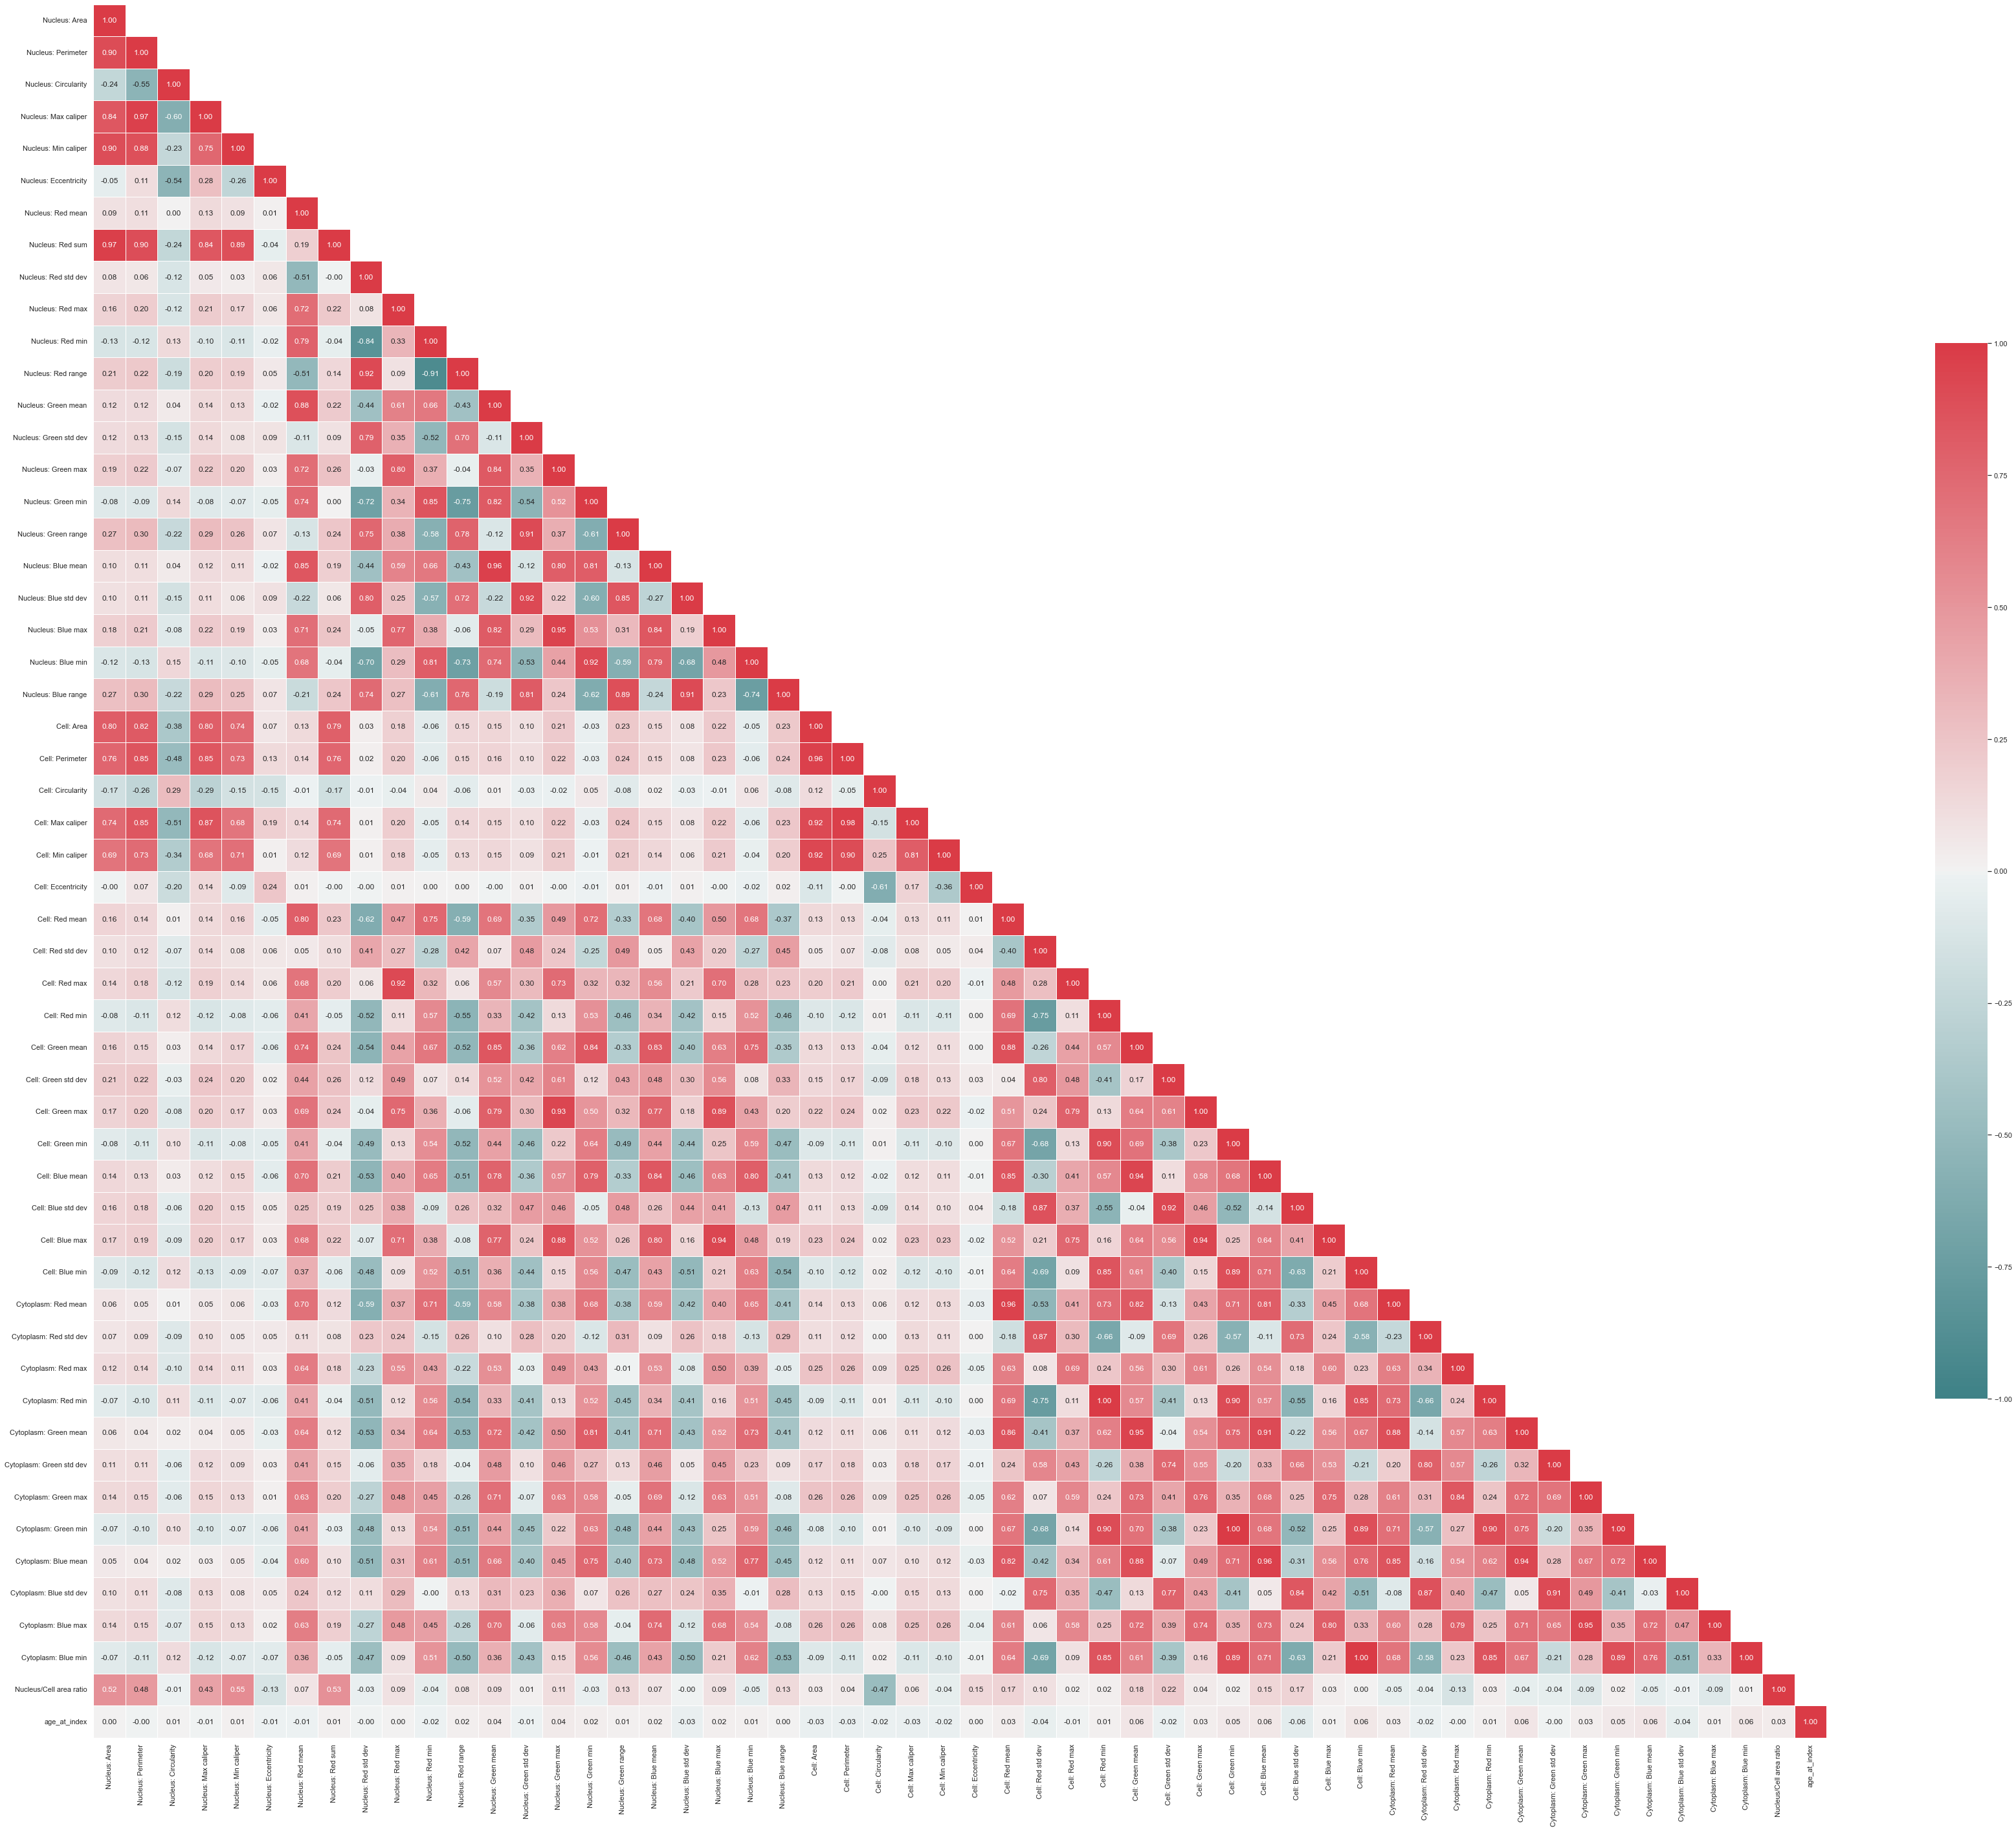

In [ ]:
#https://docs.scipy.org/doc/numpy/reference/generated/numpy.corrcoef.html
R = corrcoef(train_T)

# http://stanford.edu/~mwaskom/software/seaborn/examples/many_pairwise_correlations.html
# Generate a mask for the upper triangle
sns.set(style="white")
mask = np.zeros_like(R, dtype=bool)
mask[np.triu_indices_from(mask,k=1)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(60, 60))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(200, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(R, mask=mask, cmap=cmap, vmax=1, vmin=-1, annot=True,fmt=".2f",
            square=True, xticklabels=names, yticklabels=names,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

In [ ]:
#Defino una función para el PCA, ya que la emplearé multiples veces

def graf_pca(pca, n_componentes):
    cum_exp_var = []
    var_exp = 0
    for i in pca.explained_variance_ratio_:
        var_exp += i
        cum_exp_var.append(var_exp)

    fig, ax = plt.subplots(figsize=(8,6))
    ax.bar(range(1,n_componentes+1), cum_exp_var)
    ax.set_xlabel('Número de componentes principales')
    ax.grid()
    ax.set_ylabel('Porcentaje de varianza explicada acumulativa');

def PCA_datos(datos,n_componentes, graf = False, loading = False):
    scaler = StandardScaler()
    datos = scaler.fit_transform(datos)
    pca = PCA(n_componentes)
    pca.fit(datos)
    datos_pca = pca.transform(datos)
    if graf == True and loading == False:
        return(datos_pca, graf_pca(pca, n_componentes))
    elif graf == True and loading == True:
        loadings = pd.DataFrame(pca.components_.T)
        return(datos_pca, graf_pca(pca, n_componentes), loadings)
    else:
        return (datos_pca)

(array([[ 2.93272356e+00, -5.08416898e+00,  9.02542129e-01, ...,
         -9.05488030e-16, -1.00919099e-15, -5.49259159e-16],
        [-5.00653619e-01,  1.34628476e+00, -2.80968480e+00, ...,
         -1.38849242e-15,  2.48367122e-16, -3.79275775e-17],
        [ 5.20149813e+00, -3.90278958e+00,  1.32254801e+00, ...,
          7.04384024e-16, -3.13929929e-16,  4.40354000e-18],
        ...,
        [-7.16818533e+00, -4.12030693e+00, -7.84079394e-01, ...,
         -4.80222788e-16,  3.49437025e-19, -3.58321569e-16],
        [-5.21689658e+00,  1.12874680e-01, -2.91183087e+00, ...,
          1.00400397e-16,  2.59929840e-16,  6.72644729e-16],
        [-6.28908312e+00, -7.25418084e-01, -1.19671982e+00, ...,
         -5.60876808e-17, -1.68034046e-16, -5.46193856e-17]]),
 None,
           0         1         2         3         4         5         6   \
 0  -0.017286  0.159399  0.280579  0.040278  0.074240  0.168328  0.076226   
 1  -0.015495  0.174692  0.290782  0.042884  0.096393 -0.005920  0.0

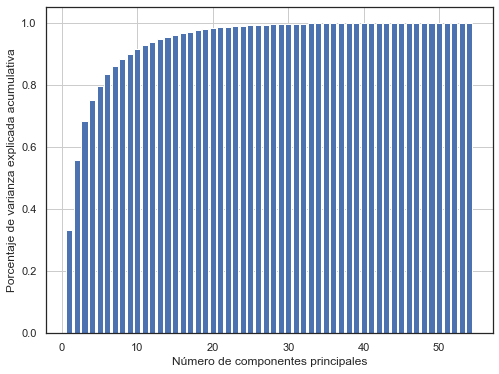

In [ ]:
PCA_datos(df_copy, 54, True, True)

Parece que con 20 variables se estabiliza la varianza, lo comprobamos.

(array([[ 2.93272356, -5.08416898,  0.90254213, ..., -0.42786415,
          0.32169306,  0.03197978],
        [-0.50065362,  1.34628476, -2.8096848 , ...,  0.86143294,
          0.6937722 , -0.15522395],
        [ 5.20149813, -3.90278958,  1.32254801, ..., -0.06350663,
         -0.4875206 ,  0.16005153],
        ...,
        [-7.16818533, -4.12030693, -0.78407939, ..., -0.02737142,
          0.19993863, -0.33939042],
        [-5.21689658,  0.11287468, -2.91183087, ...,  0.15847635,
          0.36446066,  0.51061426],
        [-6.28908312, -0.72541808, -1.19671982, ..., -0.0935756 ,
          0.32663403, -0.01900115]]),
 None)

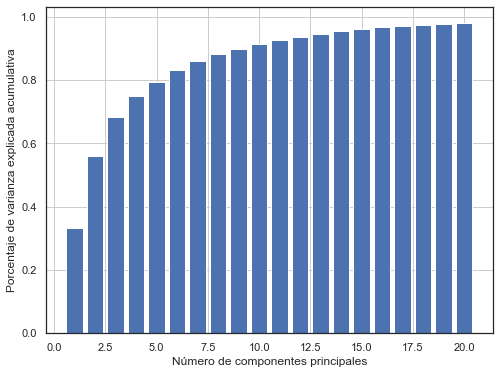

In [ ]:
PCA_datos(df_copy, 20, True)

(array([[ 2.93272356, -5.08416898,  0.90254213, ..., -1.08898004,
          0.04222084, -2.05474723],
        [-0.50065362,  1.34628476, -2.8096848 , ..., -0.80293745,
         -0.10440722, -1.01144207],
        [ 5.20149813, -3.90278958,  1.32254801, ..., -0.59160716,
         -0.08089005,  0.01738471],
        ...,
        [-7.16818533, -4.12030693, -0.78407939, ..., -0.02478896,
         -0.75093124, -0.49228267],
        [-5.21689658,  0.11287468, -2.91183087, ..., -0.05618358,
         -0.55632703, -0.39383764],
        [-6.28908312, -0.72541808, -1.19671982, ...,  0.14313319,
         -0.28800365, -0.2955722 ]]),
 None)

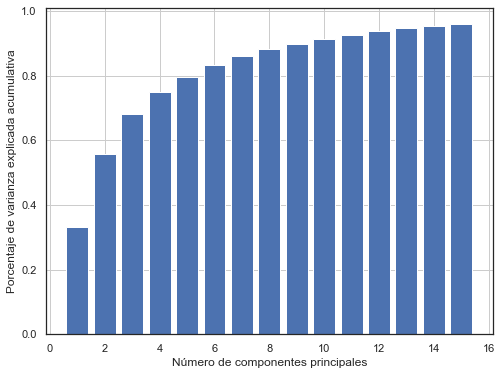

In [ ]:
#Podríamos incluso reducirlo a 15 variables sin perder mucha información
PCA_datos(df_copy, 15, True)

Se puede dar este resultado por bueno, por lo que éstas serán las variables con las que trabajaremos en el desarrollo de los modelos.

In [ ]:
#Añado la variable objetivo (target)
df_copy['ajcc_pathologic_stage'] = DATOS['ajcc_pathologic_stage']
DF = df_copy.replace({'Stage I':0, 'Stage IA':0, 'Stage II':0, 'Stage IIA':0, 'Stage IIB':0, 'Stage III':1, 'Stage IIIA':1, 'Stage IIIB':1, 'Stage IIIC':1, 'Stage IV':1})

In [ ]:
#Reescalo las variables objetivo, ya que estan muy desequilibradas
DF.groupby('ajcc_pathologic_stage')['ajcc_pathologic_stage'].count()

ajcc_pathologic_stage
0    52372
1     8359
Name: ajcc_pathologic_stage, dtype: int64

In [ ]:
DF = pd.concat([DF[:10000], DF[52372:]]).reset_index(drop=True)
#Finalmente, este es el dataframe con el que se trabajará en los modelos
DF

,Nucleus: Area,Nucleus: Perimeter,Nucleus: Circularity,Nucleus: Max caliper,Nucleus: Min caliper,Nucleus: Eccentricity,Nucleus: Red mean,Nucleus: Red sum,Nucleus: Red std dev,Nucleus: Red max,Nucleus: Red min,Nucleus: Red range,Nucleus: Green mean,Nucleus: Green std dev,Nucleus: Green max,Nucleus: Green min,Nucleus: Green range,Nucleus: Blue mean,Nucleus: Blue std dev,Nucleus: Blue max,Nucleus: Blue min,Nucleus: Blue range,Cell: Area,Cell: Perimeter,Cell: Circularity,Cell: Max caliper,Cell: Min caliper,Cell: Eccentricity,Cell: Red mean,Cell: Red std dev,Cell: Red max,Cell: Red min,Cell: Green mean,Cell: Green std dev,Cell: Green max,Cell: Green min,Cell: Blue mean,Cell: Blue std dev,Cell: Blue max,Cell: Blue min,Cytoplasm: Red mean,Cytoplasm: Red std dev,Cytoplasm: Red max,Cytoplasm: Red min,Cytoplasm: Green mean,Cytoplasm: Green std dev,Cytoplasm: Green max,Cytoplasm: Green min,Cytoplasm: Blue mean,Cytoplasm: Blue std dev,Cytoplasm: Blue max,Cytoplasm: Blue min,Nucleus/Cell area ratio,age_at_index,ajcc_pathologic_stage
0,10.25,17.7602,0.4084,7.7117,1.9068,0.9756,169.6000,7632,20.8047,210,116,94,120.6000,17.6228,151,79,72,160.7333,13.9633,185,128,57,49.75,28.6798,0.7601,11.2039,6.7518,0.7879,135.7586,28.2761,241,80,91.7783,25.0049,195,56,136.7537,21.0207,223,101,126.1203,22.0377,241,80,83.5696,20.2857,195,56,129.9241,17.3816,223,101,0.2088,51,0
1,13.25,19.8513,0.4225,8.5484,2.9053,0.9448,198.5370,10721,12.3299,230,176,54,153.4630,15.1368,196,129,67,185.9074,15.9093,234,163,71,74.75,38.8903,0.6211,15.3674,5.7004,0.9411,171.8013,50.6796,253,34,130.5795,46.9665,249,19,164.2086,39.7025,250,58,165.9798,53.9168,253,34,125.5968,49.9953,249,19,159.4839,41.7282,250,58,0.1747,51,0
2,15.00,19.1587,0.5135,7.4215,3.4992,0.9120,151.4194,9388,22.4131,211,96,115,108.3064,19.2453,162,63,99,153.2742,17.3301,199,106,93,69.00,34.3847,0.7334,12.4861,8.9706,0.6475,135.6165,31.0526,216,72,92.9462,27.6390,166,40,138.2115,24.8223,200,80,131.1014,31.7335,216,72,88.5576,28.1339,166,40,133.9078,24.9891,200,80,0.2087,51,0
3,9.25,11.8355,0.8298,4.2390,2.9300,0.7453,183.6341,7529,21.1030,214,128,86,140.6098,20.4535,172,92,80,178.0244,16.9300,206,145,61,72.00,34.9529,0.7406,13.6964,6.0000,0.8895,168.0825,36.6137,250,67,126.1684,33.7481,234,42,164.6564,28.9720,248,85,165.5320,37.9922,250,67,123.8000,34.9184,234,42,162.4640,29.9549,248,85,0.1263,51,0
4,16.00,18.1039,0.6135,6.5041,4.1922,0.8118,173.9275,12001,25.4641,237,127,110,127.7391,26.3955,197,81,116,166.3623,24.2123,226,124,102,58.50,30.1002,0.8114,10.8619,8.0000,0.6624,153.4322,33.5201,237,71,111.2500,31.4479,199,45,152.7670,27.0676,227,87,144.9641,32.8371,231,71,104.4371,30.9020,199,45,147.1497,26.2389,227,87,0.2676,51,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18354,24.50,20.8366,0.7091,8.4479,3.9879,0.9089,233.3824,23805,14.5738,254,175,79,221.9804,20.5238,252,139,113,234.4608,15.0014,253,182,71,77.00,35.8458,0.7530,13.0139,7.8549,0.8049,185.7348,45.5381,254,82,165.3035,51.3918,252,53,196.7220,38.0425,253,108,162.7014,36.6472,240,82,137.9052,37.5082,220,53,178.4787,31.8712,243,108,0.3084,66,1
18355,20.00,22.3476,0.5032,7.6051,5.4126,0.5735,228.9881,19235,14.4984,252,195,57,210.2024,22.9493,248,167,81,225.1310,15.9840,255,192,63,57.50,32.9727,0.6646,11.1179,8.3971,0.6588,203.6468,26.2428,252,141,179.8979,32.2664,255,117,206.9191,20.5130,255,164,189.5497,19.9589,244,141,163.0397,23.0726,255,117,196.7881,15.0331,250,164,0.3369,66,1
18356,11.00,13.9769,0.7076,5.6723,2.8290,0.8580,222.0400,11102,13.2495,248,193,55,188.5800,14.0525,233,158,75,212.5400,13.4501,244,185,59,63.50,29.8445,0.8959,10.7673,7.6357,0.7013,199.5097,26.7215,253,134,171.3346,27.0731,249,111,201.5292,20.9271,250,151,194.0676,26.3178,253,134,167.1691,27.8255,249,111,198.8696,21.5564,250,151,0.1747,66,1
18357,16.50,17.9830,0.6412,7.0063,3.1950,0.9142,231.7429

# Implementación de modelos de ML

Para evaluar los modelos se empleará la matriz de confusión y los parámetros derivados de la misma. Para evitar recargar el código, definiré las funciones necesarias para reejecutarlo repetidas veces.

In [ ]:
#Este código se ha extraido de diversas fuentes, con modificaciones propias, el siguiente enlace es la fuente principal.
#https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels

def validacion(y_test,y_pred):

    matriz_confusion = confusion_matrix(y_test, y_pred)
    plt.imshow(matriz_confusion, interpolation='nearest', cmap=plt.cm.OrRd)
    plt.title('Matriz de confusión')
    tick_marks = np.arange(2)
    plt.xticks(tick_marks, ['Positivo','Negativo'], rotation=45)
    plt.yticks(tick_marks, ['Positivo','Negativo'])

    fmt = 'g'
    thresh = matriz_confusion.max() / 2.
    for i, j in itertools.product(range(matriz_confusion.shape[0]), range(matriz_confusion.shape[1])):
        plt.text(j, i, format(matriz_confusion[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if matriz_confusion[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Valor Real')
    plt.xlabel('Valor Predicho')

    VP = matriz_confusion[0][0]
    VN = matriz_confusion[1][1]
    FN = matriz_confusion[0][1]
    FP = matriz_confusion[1][0]

    #Parámetros derivados
    exactitud = (VP+VN)/(VP+VN+FP+FN)
    precision = VP/(VP+FP)
    sensibilidad = VP/(VP+FN)
    F1 = 2*precision*sensibilidad/(precision+sensibilidad)

    validacion = pd.DataFrame(columns=('Exactitud', 'Precisión', 'Sensibilidad', 'F1'))
    validacion.loc[len(validacion)] = [exactitud,precision,sensibilidad,F1]

    return validacion

## Parametrización GridSearch

In [ ]:
#FUENTE: https://blog.escueladedatosvivos.ai/como-hacer-optimizacion-parametros-python/
import os
import numpy as np  # linear algebra
import pandas as pd  #
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
#pip install lightgbm
import lightgbm as lgb
from sklearn.metrics import confusion_matrix
#import scikitplot as skplt
#Dataframe de resultados
cols = ['Case','KNN','SVM','LogReg']

resul = pd.DataFrame(columns=cols)
resul.set_index("Case",inplace=True)
resul.loc['Standard'] = [0,0,0]
resul.loc['GridSearch'] = [0,0,0]
resul.head()

,KNN,SVM,LogReg
Case,,,
Standard,0,0,0
GridSearch,0,0,0


In [ ]:
#Preparamos los datos
#https://cienciadedatos.net/documentos/py17-regresion-logistica-python
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
datos_modelos = DF.drop(['ajcc_pathologic_stage'], axis=1)
x = PCA_datos(datos_modelos,15)
y = DF['ajcc_pathologic_stage']
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=42)

In [ ]:
PCA_datos(datos_modelos,15)

array([[ 2.74137555, -4.99875956,  0.77644732, ..., -1.61720599,
         1.63993127, -0.23516007],
       [-0.41408007,  1.21237365, -2.83228621, ..., -0.7816671 ,
         0.94230362, -0.15834832],
       [ 5.01826588, -3.81007979,  1.17009957, ..., -0.39990466,
        -0.20080148, -0.32250963],
       ...,
       [-7.31413058, -3.98421905, -0.83099214, ..., -0.13922262,
         0.49203316, -0.95525493],
       [-5.26804527,  0.01409985, -2.86229449, ..., -0.02304825,
         0.55472603, -0.28008856],
       [-6.38384222, -0.71058784, -1.2184975 , ...,  0.05885998,
         0.35362927, -0.32680655]])

In [ ]:
#Creación de Modelos

knn   = KNeighborsClassifier()
svc   = SVC(gamma='auto')
lr    =  LogisticRegression(solver='liblinear')


models = [knn,svc,lr]

col = 0
for model in models:
    model.fit(x_train,y_train.values.ravel())
    resul.iloc[0,col] = model.score(x_test,y_test)
    col += 1

resul.head()

,KNN,SVM,LogReg
Case,,,
Standard,0.813998,0.869826,0.69744
GridSearch,0.000000,0.000000,0.00000


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold


#K-Nearest - Neighborg
n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']
knn_grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)

#Support Vector Classifier
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']
svc_grid = dict(kernel=kernel,C=C,gamma=gamma)


#Logistic Regression
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
lr_grid = dict(solver=solvers,penalty=penalty,C=c_values)
'''
#LGB
class_weight = [None,'balanced']
boosting_type = ['gbdt', 'goss', 'dart']
num_leaves = [30,50,100,150] #list(range(30, 150)),
learning_rate = list(np.logspace(np.log(0.005), np.log(0.2), base = np.exp(1), num = 5)) #1000
lgg_grid = dict(class_weight=class_weight, boosting_type=boosting_type, num_leaves=num_leaves, force_col_wise=["true"])
'''

'\n#LGB\nclass_weight = [None,\'balanced\']\nboosting_type = [\'gbdt\', \'goss\', \'dart\']\nnum_leaves = [30,50,100,150] #list(range(30, 150)),\nlearning_rate = list(np.logspace(np.log(0.005), np.log(0.2), base = np.exp(1), num = 5)) #1000\nlgg_grid = dict(class_weight=class_weight, boosting_type=boosting_type, num_leaves=num_leaves, force_col_wise=["true"])\n'

In [ ]:
models = [knn,svc,lr]

grids = [knn_grid,svc_grid,lr_grid]

col = 0

for ind in range(0,len(models)):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3,random_state=1)
    grid_search = GridSearchCV(estimator=models[col],
                  param_grid=grids[col], n_jobs=-1, cv=cv,
                  scoring='accuracy',error_score=0)
    grid_clf_acc = grid_search.fit(x_train, y_train)
    print(f"Modelo:{models[col]}, {grid_search.best_params_} \u2713")
    resul.iloc[1,col] = grid_clf_acc.score(x_test,y_test)


    col += 1


resul.head()
#Resultados por si se reejecuta y falta tiempo o recursos
'''
Modelo:KNeighborsClassifier(), {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'} ✓
Modelo:SVC(gamma='auto'), {'C': 50, 'gamma': 'scale', 'kernel': 'rbf'} ✓
Modelo:LogisticRegression(solver='liblinear'), {'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'} ✓
'''

Modelo:KNeighborsClassifier(), {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'} ✓
Modelo:SVC(gamma='auto'), {'C': 50, 'gamma': 'scale', 'kernel': 'rbf'} ✓
Modelo:LogisticRegression(solver='liblinear'), {'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'} ✓


,KNN,SVM,LogReg,LGB
Case,,,,
Standard,0.813998,0.869826,0.697168,0.878268
GridSearch,0.840414,0.885349,0.699346,0.000000


### Regresión logística

,Exactitud,Precisión,Sensibilidad,F1
0,0.699346,0.70933,0.757636,0.732688


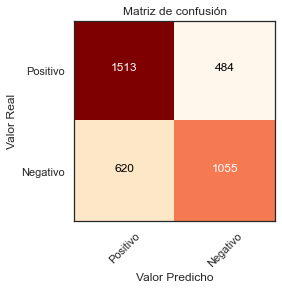

In [ ]:
LR = LogisticRegression(C= 0.01, penalty = 'l2', solver='newton-cg').fit(x_train,y_train)
y_pred = LR.predict(x_test)
validacion(y_test,y_pred)

### Máquinas de soporte vectorial

,Exactitud,Precisión,Sensibilidad,F1
0,0.885349,0.885519,0.90636,0.895818


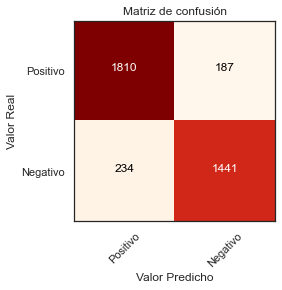

In [ ]:
#https://scikit-learn.org/stable/modules/svm.html#kernel-functions
clf = svm.SVC(kernel='rbf', gamma='scale', C=50)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
validacion(y_test,y_pred)

###  K-Nearest Neighbors

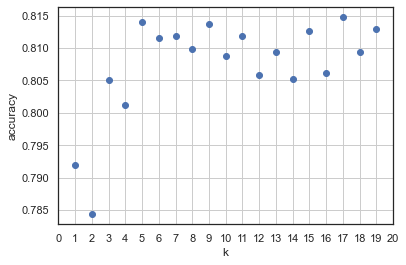

In [ ]:
#Calculamos el mejor valor de K
#https://www.aprendemachinelearning.com/clasificar-con-k-nearest-neighbor-ejemplo-en-python/
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train, y_train)
    scores.append(knn.score(x_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks(range(0, 21))
plt.grid()

,Exactitud,Precisión,Sensibilidad,F1
0,0.840414,0.831376,0.886329,0.857974


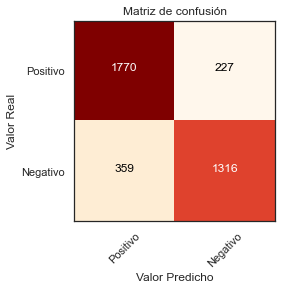

In [ ]:

#neigh = KNeighborsClassifier(n_neighbors = k).fit(x_train,y_train)
neigh = KNeighborsClassifier(metric= 'manhattan', n_neighbors= 9, weights= 'distance').fit(x_train,y_train)
y_pred = neigh.predict(x_test)
validacion(y_test,y_pred)


### Random Forest

In [ ]:
param_grid = ParameterGrid(
                {'n_estimators': [150],
                 'max_features': [5, 7, 9],
                 'max_depth'   : [None, 3, 10, 20],
                 'criterion'   : ['gini', 'entropy']
                }
            )

resultados = {'params': [], 'oob_accuracy': []}

for params in param_grid:

    modelo = RandomForestClassifier(
                oob_score    = True,
                n_jobs       = -1,
                random_state = 123,
                ** params
             )

    modelo.fit(x_train, y_train)

    resultados['params'].append(params)
    resultados['oob_accuracy'].append(modelo.oob_score_)
    print(f"Modelo: {params} \u2713")

resultados = pd.DataFrame(resultados)
resultados = pd.concat([resultados, resultados['params'].apply(pd.Series)], axis=1)
resultados = resultados.sort_values('oob_accuracy', ascending=False)
resultados = resultados.drop(columns = 'params')
resultados.head(4)

Modelo: {'criterion': 'gini', 'max_depth': None, 'max_features': 5, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': None, 'max_features': 7, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': None, 'max_features': 9, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': 3, 'max_features': 5, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': 3, 'max_features': 7, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': 3, 'max_features': 9, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': 10, 'max_features': 5, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': 10, 'max_features': 7, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': 10, 'max_features': 9, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': 20, 'max_features': 5, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': 20, 'max_features': 7, 'n_estimators': 150} ✓
Modelo: {'criterio

,oob_accuracy,criterion,max_depth,max_features,n_estimators
14,0.884047,entropy,NaN,9,150
22,0.882890,entropy,20.0,7,150
23,0.882141,entropy,20.0,9,150
13,0.882073,entropy,NaN,7,150


,Exactitud,Precisión,Sensibilidad,F1
0,0.879357,0.867898,0.917877,0.892188


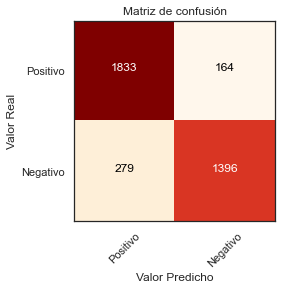

In [ ]:
pred_y = modelo.predict(x_test)
validacion(y_test, pred_y)

### Light Gradient Boost/Lightgbm (investigar)

In [ ]:
from sklearn.model_selection import ParameterGrid

param_grid = {
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 5, 7],
    'num_leaves': [15, 31, 63],
    'n_estimators': [50, 100, 200],
}

import lightgbm as lgb
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split


# Initialize the LightGBM model
params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'device': 'gpu',
}

lgb_model = lgb.LGBMClassifier(**params)

from sklearn.model_selection import GridSearchCV

# Initialize the GridSearchCV object
grid_search = GridSearchCV(
    estimator=lgb_model,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
)

grid_search.fit(x_train, y_train)

best_model = grid_search.best_estimator_
test_score = best_model.score(x_test, y_test)

print(f'Test accuracy: {test_score:.4f}')

[LightGBM] [Info] Number of positive: 6684, number of negative: 8003
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 3825
[LightGBM] [Info] Number of data points in the train set: 14687, number of used features: 15
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 2060, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 15 dense feature groups (0.22 MB) transferred to GPU in 0.001051 secs. 0 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.455096 -> initscore=-0.180100
[LightGBM] [Info] Start training from score -0.180100
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with p

In [ ]:
best_model

LGBMClassifier(device='gpu', max_depth=7, metric='binary_logloss',
               n_estimators=200, num_leaves=63, objective='binary')

[LightGBM] [Info] Number of positive: 6684, number of negative: 8003
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 3825
[LightGBM] [Info] Number of data points in the train set: 14687, number of used features: 15
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 2060, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 15 dense feature groups (0.22 MB) transferred to GPU in 0.001322 secs. 0 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.455096 -> initscore=-0.180100
[LightGBM] [Info] Start training from score -0.180100
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with p

,Exactitud,Precisión,Sensibilidad,F1
0,0.891612,0.886792,0.917877,0.902067


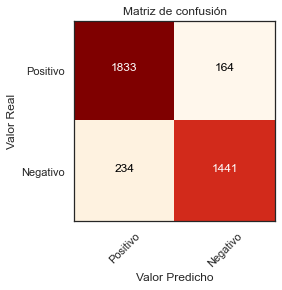

In [ ]:
LGG = lgb.LGBMClassifier(device='gpu', max_depth=7, metric='binary_logloss', n_estimators=200, num_leaves=63, objective='binary').fit(x_train,y_train)
y_pred = LGG.predict(x_test)
validacion(y_test,y_pred)